In [1]:
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import os
import cv2
import seaborn as sns
import torch
import torch.nn.functional as F
import math

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
path_train_high = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\train\high_res'
path_train_low = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\train\low_res'
path_val_high = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\val\high_res'
path_val_low = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\val\low_res'

In [4]:
#### Funcion para leer imagenes dentro de una carpeta
width = 256
height = 256
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = imread(path1)
        if (len(originalImage.shape)==3):
            originalImage = imread(path1)[:,:,2]
        #print(originalImage.shape)
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images

C:\Users\ASUS\anaconda3\envs\pytorch\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


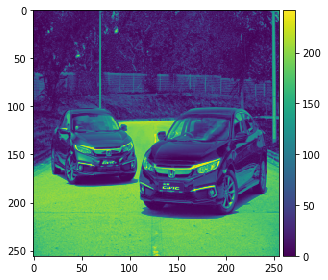

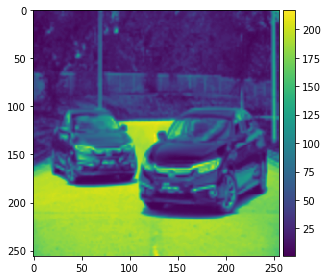

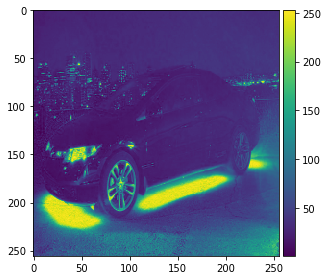

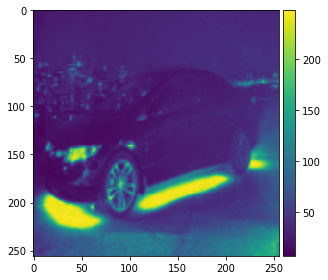

In [5]:
train_high = imageReading (path_train_high)
train_low = imageReading (path_train_low)
val_high = imageReading (path_val_high)
val_low = imageReading (path_val_low)

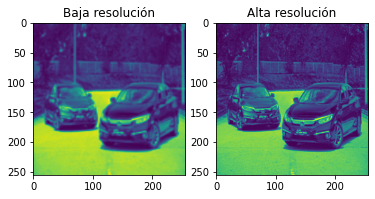

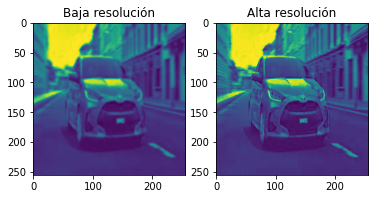

In [6]:
plt.figure(1)
plt.subplot(122)
plt.imshow(np.reshape(train_high[0],(256,256))),plt.title('Alta resolución')
plt.subplot(121),plt.imshow(np.reshape(train_low[0],(256,256))), plt.title('Baja resolución')
plt.show()

plt.figure(2)
plt.subplot(122)
plt.imshow(np.reshape(val_high[3],(256,256))),plt.title('Alta resolución')
plt.subplot(121),plt.imshow(np.reshape(val_low[3],(256,256))), plt.title('Baja resolución')
plt.show()


In [7]:
print(train_high.shape, train_low.shape, val_high.shape,val_low.shape)

(685, 256, 256) (685, 256, 256) (170, 256, 256) (170, 256, 256)


In [ ]:
'''
train_high = train_high[0:100,:]
train_low  = train_low[0:100,:]
vali_high = val_high[0:32,:]
vali_low = val_low[0:32,:]
test_high = val_high[32:48]
test_low = val_low[32:48]
'''

In [8]:
train_high = train_high[0:225,:]
train_low  = train_low[0:225,:]
vali_high = val_high[0:64,:]
vali_low = val_low[0:64,:]
test_high = val_high[65:97]
test_low = val_low[65:97]

In [9]:
print(train_high.shape, train_low.shape, vali_high.shape,vali_low.shape,test_high.shape,test_low.shape)

(225, 256, 256) (225, 256, 256) (64, 256, 256) (64, 256, 256) (32, 256, 256) (32, 256, 256)


In [10]:
train_high = torch.from_numpy(np.array(train_high).reshape(-1,1,256,256)).float() 
train_low = torch.from_numpy(np.array(train_low).reshape(-1,1,256,256)).float()
val_high = torch.from_numpy(np.array(vali_high).reshape(-1,1,256,256)).float() 
val_low = torch.from_numpy(np.array(vali_low).reshape(-1,1,256,256)).float()
test_high = torch.from_numpy(np.array(test_high).reshape(-1,1,256,256)).float() 
test_low = torch.from_numpy(np.array(test_low).reshape(-1,1,256,256)).float() 

In [11]:
print(train_high.shape, train_low.shape, val_high.shape,val_low.shape,test_high.shape,test_low.shape)

torch.Size([225, 1, 256, 256]) torch.Size([225, 1, 256, 256]) torch.Size([64, 1, 256, 256]) torch.Size([64, 1, 256, 256]) torch.Size([32, 1, 256, 256]) torch.Size([32, 1, 256, 256])


In [12]:
img_train = []
for i in range(train_high.shape[0]):
      img_train.append(((((train_low[i]/255.0)-0.5)*2),(((train_high[i]/255.0)-0.5)*2)))
        
img_val = []
for i in range(val_high.shape[0]):
      img_val.append(((((val_low[i]/255.0)-0.5)*2),(((val_high[i]/255.0)-0.5)*2)))
        
img_test = []
for i in range(test_high.shape[0]):
      img_test.append(((((test_low[i]/255.0)-0.5)*2),(((test_high[i]/255.0)-0.5)*2)))

In [13]:
print(len(img_train),len(img_val),len(img_test))

225 64 32


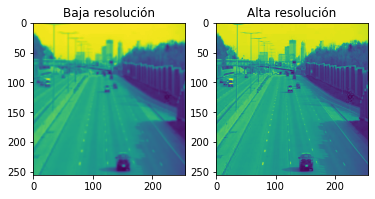

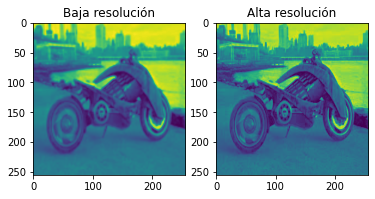

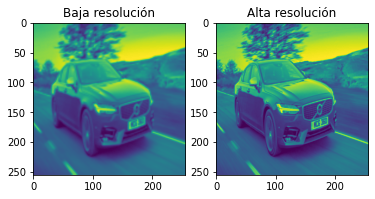

In [14]:
plt.figure(3)
plt.subplot(121)
plt.imshow(np.reshape(img_train[15][0],(256,256))),plt.title('Baja resolución')
plt.subplot(122),plt.imshow(np.reshape(img_train[15][1],(256,256))), plt.title('Alta resolución')
plt.show()
plt.figure(4)
plt.subplot(121)
plt.imshow(np.reshape(img_val[15][0],(256,256))),plt.title('Baja resolución')
plt.subplot(122),plt.imshow(np.reshape(img_val[15][1],(256,256))), plt.title('Alta resolución')
plt.show()
plt.figure(5)
plt.subplot(121)
plt.imshow(np.reshape(img_test[15][0],(256,256))),plt.title('Baja resolución')
plt.subplot(122),plt.imshow(np.reshape(img_test[15][1],(256,256))), plt.title('Alta resolución')
plt.show()


In [15]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=img_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=img_val, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=img_test, batch_size=batch_size, shuffle=True)

In [16]:
img_train[0][0].shape

torch.Size([1, 256, 256])

### Modelo

#### Modelo 2

In [30]:
 ################################FORWARD ENCODER####################################################
class Encoder2(nn.Module):
    def __init__(self):
        super(Encoder2, self).__init__()
        #input 256x256
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=2, stride=1, padding=0), #255
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=2, stride=1, padding=0),#254
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) #127
            
        self.MaxPool = nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True) 
            
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2, stride=1, padding=0), #126
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2, stride=1, padding=0), #125
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) #63
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2, stride=1, padding=0), #62
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2, stride=1, padding=0), #61
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) # 31
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, stride=1, padding=0), #30
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=2, stride=1, padding=0), #29
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) # 15
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=2, stride=1, padding=0), #14
            nn.Tanh())
            
        self.fc = nn.Linear(in_features=512*13*13, out_features=10)
        
    def forward(self, image):
        #print("image",image.shape)
            
        out0 = self.layer1(image)
        #print("out",out0.shape)
        out1,indice1 = self.MaxPool(out0)
        #print("out1",out1.shape)
            
        out2 = self.layer2(out1)
        #print("out2",out2.shape)
        out3,indice3 = self.MaxPool(out2)
        #print("out3",out3.shape)
            
        out4 = self.layer3(out3)
        #print("out4",out4.shape)
        out5,indice5 = self.MaxPool(out4)
        #print("out5",out5.shape)
            
        out6 = self.layer4(out5)
        #print("out6",out6.shape)
        out7,indice7 = self.MaxPool(out6)
        #print("out7",out7.shape)    
            
        out8 = self.layer5(out7)            
        #print("out8",out8.shape)
        out9 = out8.view(out8.size(0), -1)
        #print("outflatten1",out9.shape)
        z = self.fc(out9)    
        #print("latente enconder",z.shape)
        return z, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6
    
  ################################FORWARD DECODER####################################################
            
class Decoder2(nn.Module):
    def __init__(self):
        super(Decoder2, self).__init__()
        self.fc    = nn.Linear(in_features=10,out_features=512*13*13)
        self.layer1Deco = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512,out_channels=256, kernel_size=2, stride=1, padding=0),
            nn.ReLU())
        
        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0)
        
        self.layer2Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=2, stride=1, padding=0), #25
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=2, stride=1, padding=0), #27
            nn.ReLU())
        
        self.layer3Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=128, out_channels=128, kernel_size=2, stride=1, padding=0), #59
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=2, stride=1, padding=0), #57
            nn.ReLU())
        
        self.layer4Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), #6
            nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=2, stride=1, padding=0), #124
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=2, stride=1, padding=0), #122
            nn.ReLU())
        
        self.layer5Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=2, stride=1, padding=0), #27
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=1, kernel_size=2, stride=1, padding=0), #25
            nn.Tanh())
           
        
    def forward(self, latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6):
        #print("latente decoder",latent.shape)
        out = self.fc(latent)
        #print("latente decoder-fc",out.shape)
        out = out.view(out.size(0), 512, 13, 13)
        #print("latente convertida",out.shape)
        out = self.layer1Deco(out)
        #print("layer1Deco",out.shape)
        
        out = self.unpool(out,indice7,output_size=out6.size())
        #print("unpooling",out.shape)
        out = self.layer2Deco(out)
        #print("layer2Deco",out.shape)
        
        out = self.unpool(out,indice5,output_size=out4.size())
        #print("unpooling2",out.shape)
        out = self.layer3Deco(out)
        #print("layer3Deco",out.shape)
        
        out = self.unpool(out,indice3,output_size=out2.size())
        #print("unpooling2",out.shape)
        out = self.layer4Deco(out)
        #print("layer4Deco",out.shape)
        
        out = self.unpool(out,indice1,output_size=out0.size())
        #print("unpooling2",out.shape)
        out = self.layer5Deco(out)
        #print("layer5Deco",out.shape)
        
        return out

In [31]:
class Autoencoder2(nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        self.encoder = Encoder2()
        self.decoder = Decoder2()

    def forward(self, x):
        latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6 = self.encoder(x.float())
        x_recon = self.decoder(latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6)
        return  x_recon

In [32]:
def train(model, train_loader, Epochs, loss_fn):
    train_loss_avg = []
    val_loss_avg = []
    for epoch in range(Epochs):
        train_loss_avg.append(0)
        num_batches = 0
        
        
        for image_batch_low,image_batch_high in train_loader:
            image_batch_low = image_batch_low.to(device)
            image_batch_high = image_batch_high.to(device)
            
            
            #print(image_batch.size())
            #print(image_batch)
            
            image_batch_recon = model(image_batch_low)
            # print(image_batch_recon.size())        
           
            
            loss = loss_fn(image_batch_recon, image_batch_high)
            #print("el loss es :",loss)  
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
          
            train_loss_avg[-1] += loss.item()
            num_batches += 1
          
        train_loss_avg[-1] /= num_batches
        #print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, Epochs, train_loss_avg[-1]))
        
        val_loss_avg.append(0)
        num_batches = 0  
        for image_batch_low, image_batch_high in val_loader:
            image_batch_low = image_batch_low.to(device)
            image_batch_high = image_batch_high.to(device)

            image_batch_recon = model(image_batch_low)

            loss = loss_fn(image_batch_recon, image_batch_high)
            # Calculate loss
            val_loss_avg[-1] +=loss.item()
            num_batches += 1
            
        val_loss_avg[-1] /= num_batches

        print(f'Epoch {epoch+1} Training Loss: {train_loss_avg[-1]} Validation Loss: {val_loss_avg[-1]}')
 
    return train_loss_avg, val_loss_avg

In [33]:
%%time   
learning_rate = 0.001
autoencoder = Autoencoder2().float()
autoencoder.to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-5)

autoencoder.train()


list_loss_train,list_loss_validation = train(autoencoder,train_loader,20,loss)

Epoch 1 Training Loss: 0.3628867745399475 Validation Loss: 0.3125036656856537
Epoch 2 Training Loss: 0.3513861914475759 Validation Loss: 0.3221992403268814
Epoch 3 Training Loss: 0.3190898915131887 Validation Loss: 0.17655310034751892
Epoch 4 Training Loss: 0.19845979313055676 Validation Loss: 0.1293974295258522
Epoch 5 Training Loss: 0.13307233303785324 Validation Loss: 0.13050969131290913
Epoch 6 Training Loss: 0.15571384529272717 Validation Loss: 0.12290143221616745
Epoch 7 Training Loss: 0.125555881857872 Validation Loss: 0.09005726873874664
Epoch 8 Training Loss: 0.11099628160397211 Validation Loss: 0.08642676658928394
Epoch 9 Training Loss: 0.10141517519950867 Validation Loss: 0.07908916287124157
Epoch 10 Training Loss: 0.09517910381158193 Validation Loss: 0.07475660368800163
Epoch 11 Training Loss: 0.08896334518988927 Validation Loss: 0.06995720230042934
Epoch 12 Training Loss: 0.08508737037579218 Validation Loss: 0.0705196987837553
Epoch 13 Training Loss: 0.0982397586107254 Val

In [34]:
list_loss_train,list_loss_validation

([0.3628867745399475,
  0.3513861914475759,
  0.3190898915131887,
  0.19845979313055676,
  0.13307233303785324,
  0.15571384529272717,
  0.125555881857872,
  0.11099628160397211,
  0.10141517519950867,
  0.09517910381158193,
  0.08896334518988927,
  0.08508737037579218,
  0.0982397586107254,
  0.09071913560231527,
  0.09113556196292241,
  0.09786741683880489,
  0.10192772150039672,
  0.09657635440429052,
  0.08898309916257859,
  0.09222295780976614],
 [0.3125036656856537,
  0.3221992403268814,
  0.17655310034751892,
  0.1293974295258522,
  0.13050969131290913,
  0.12290143221616745,
  0.09005726873874664,
  0.08642676658928394,
  0.07908916287124157,
  0.07475660368800163,
  0.06995720230042934,
  0.0705196987837553,
  0.0817518662661314,
  0.0743897594511509,
  0.09367553889751434,
  0.08541794121265411,
  0.0754374023526907,
  0.08243753388524055,
  0.08020688779652119,
  0.09830186702311039])

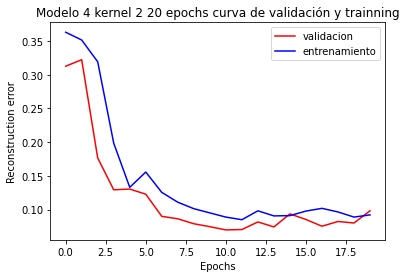

In [38]:
fig = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
#plt.plot(loss_result)
plt.title('Modelo 4 kernel 2 20 epochs curva de validación y trainning')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()

In [36]:
def Show(out, title = ''):
    print(title)
    out = out.permute(1,0,2,3)
    grilla = torchvision.utils.make_grid(out,10,5)
    plt.imshow(transforms.ToPILImage()(grilla), 'jet')
    plt.show()

def Show_Weight(out):
    grilla = torchvision.utils.make_grid(out)
    plt.imshow(transforms.ToPILImage()(grilla), 'jet')
    plt.show()

In [37]:
capacity = 64
latent_dims = 10 
autoencoder.eval()


tensor = torch.zeros(len(test_loader),2)


with torch.no_grad():

    image,label = iter(test_loader).next()
    
    image = image.to(device)
    z, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6 = autoencoder.encoder(image) # Solo decoder para sacar el Z
    #print(z)
    print(z.shape)
    z = z.to('cpu')
    mean = z.mean(dim=0)

    std = (z - mean).pow(2).mean(dim=0).sqrt()

    z1 = torch.randn(16, latent_dims)*std + mean
    z1 = z1.to(device)
    print(z1.shape)
    decodificado = autoencoder.decoder(z1, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6)



    decodificado = decodificado.to('cpu')
    
    fig, ax = plt.subplots(figsize=(256, 256))
    Show_Weight(image[1:5])
    plt.show()
    fig, ax = plt.subplots(figsize=(256, 256))
    Show_Weight(decodificado[1:5])
    plt.show()
    

torch.Size([16, 10])
torch.Size([16, 10])
